#                                            Predicting the Price Category of Houses


In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
# Importing the dataset
train = pd.read_csv('train.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceCategory
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,Medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,Low
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,Medium
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,Low
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,Low
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,Medium
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,Medium
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,Low


In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 1460 non-null   int64  
 1   MSSubClass         1460 non-null   int64  
 2   MSZoning           1460 non-null   object 
 3   LotFrontage        1201 non-null   float64
 4   LotArea            1460 non-null   int64  
 5   Street             1460 non-null   object 
 6   Alley              91 non-null     object 
 7   LotShape           1460 non-null   object 
 8   LandContour        1460 non-null   object 
 9   Utilities          1460 non-null   object 
 10  LotConfig          1460 non-null   object 
 11  LandSlope          1460 non-null   object 
 12  Neighborhood       1460 non-null   object 
 13  Condition1         1460 non-null   object 
 14  Condition2         1460 non-null   object 
 15  BldgType           1460 non-null   object 
 16  HouseStyle         1460 

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


# Dealing with the Missing values

### This function gives us the number of missing values in each column

In [7]:
def basic_details(dataset):
    b = pd.DataFrame()
    b['Missing value'] = dataset.isnull().sum().sort_values(ascending=False)
    b['dtype'] = dataset.dtypes
    return b
basic_details(train)

,Missing value,dtype
PoolQC,1453,object
MiscFeature,1406,object
Alley,1369,object
Fence,1179,object
FireplaceQu,690,object
...,...,...
CentralAir,0,object
SaleCondition,0,object
Heating,0,object
TotalBsmtSF,0,int64


### There are so many missing values in Alley, PoolQC, Fence, MiscFeature and FirePlaceQ, so we should drop these columns

In [8]:
del train['Alley']
del train['PoolQC']
del train['Fence']
del train['MiscFeature']
del train['FireplaceQu']
# And also Id column is of no use, we should drop that also
del train['Id']

In [9]:
basic_details(train)

,Missing value,dtype
LotFrontage,259,float64
GarageType,81,object
GarageYrBlt,81,float64
GarageCond,81,object
GarageQual,81,object
...,...,...
CentralAir,0,object
HeatingQC,0,object
SaleCondition,0,object
TotalBsmtSF,0,int64


### Distribution Plots

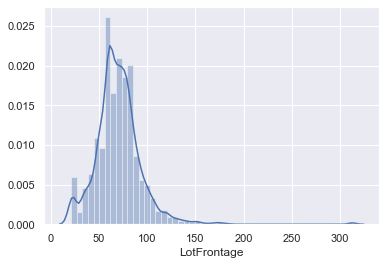

In [10]:
#plotting the lotfrontage
sns.distplot(train['LotFrontage'])

In [11]:
#Missing data can safely be replaced by the median value (better than the mean as the distribution is assymmetric)
train.LotFrontage=train.LotFrontage.fillna(value=train.LotFrontage.median())

In [12]:
# Replacing the missing data of GarageYrBlt with the median
train.GarageYrBlt=train.GarageYrBlt.fillna(value=train.GarageYrBlt.median())

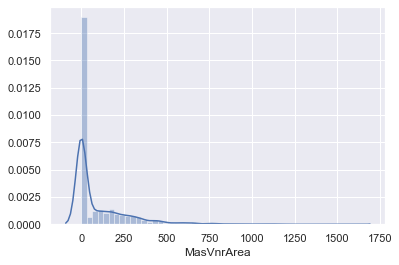

In [13]:
sns.distplot(train['MasVnrArea'])

In [14]:
# Replacing the missing data with the mode as the data is skewed
train.MasVnrArea=train.MasVnrArea.fillna(value=train.MasVnrArea.mode()[0])

In [15]:
basic_details(train)

,Missing value,dtype
GarageType,81,object
GarageFinish,81,object
GarageCond,81,object
GarageQual,81,object
BsmtFinType2,38,object
...,...,...
1stFlrSF,0,int64
CentralAir,0,object
HeatingQC,0,object
SaleCondition,0,object


### Filling the missing values with the help of mode of each column

In [16]:
train.GarageType=train.GarageType.fillna(value=train.GarageType.mode()[0])
train.GarageFinish=train.GarageFinish.fillna(value=train.GarageFinish.mode()[0])
train.GarageCond=train.GarageCond.fillna(value=train.GarageCond.mode()[0])
train.GarageQual=train.GarageQual.fillna(value=train.GarageQual.mode()[0])
train.BsmtFinType2=train.BsmtFinType2.fillna(value=train.BsmtFinType2.mode()[0])
train.BsmtExposure=train.BsmtExposure.fillna(value=train.BsmtExposure.mode()[0])
train.BsmtFinType1=train.BsmtFinType1.fillna(value=train.BsmtFinType1.mode()[0])
train.BsmtCond=train.BsmtCond.fillna(value=train.BsmtCond.mode()[0])
train.BsmtQual=train.BsmtQual.fillna(value=train.BsmtQual.mode()[0])
train.MasVnrType=train.MasVnrType.fillna(value=train.MasVnrType.mode()[0])
train.Electrical=train.Electrical.fillna(value=train.Electrical.mode()[0])

In [17]:
basic_details(train)

,Missing value,dtype
SalePriceCategory,0,object
YearRemodAdd,0,int64
RoofMatl,0,object
Exterior1st,0,object
Exterior2nd,0,object
...,...,...
KitchenAbvGr,0,int64
KitchenQual,0,object
TotRmsAbvGrd,0,int64
Functional,0,object


### Exploratory data analysis

In [18]:
#Creating a data frame with numerical varibles only
numerical_data=train.select_dtypes(exclude='object')
numerical_data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


## Checking the Correlation

In [19]:
numerical_data.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,...,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,...,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,...,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,...,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,...,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,...,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,...,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,...,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,...,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,...,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706


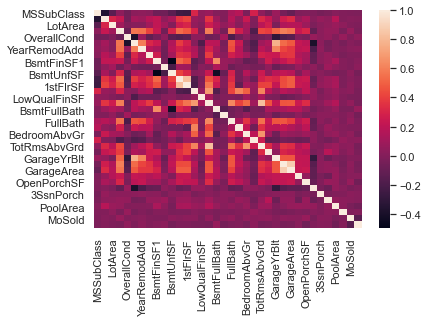

In [20]:
sns.heatmap(numerical_data.corr())

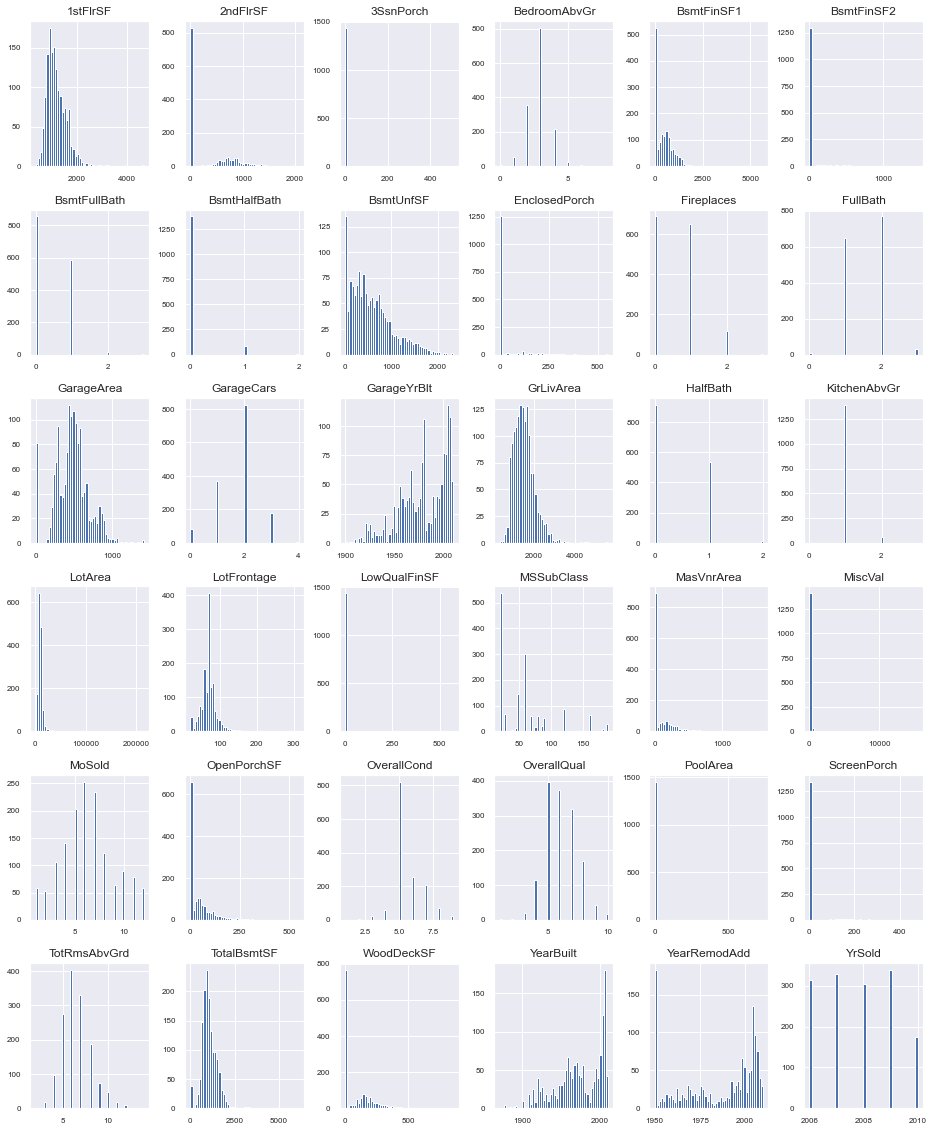

In [21]:
graphs=numerical_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

### We can see that there are outliers in the data but since we tend to use Random forest classifier algorithm, we can keep the outliers as random forest classifier is robust to outliers.

## Since this is the classification problem, we should convert our output varibale as Categorical variable

In [22]:
train['SalePriceCategory']=pd.Categorical (train['SalePriceCategory'])

In [23]:
train['SalePriceCategory']

0       Medium
1          Low
2       Medium
3          Low
4       Medium
         ...  
1455       Low
1456    Medium
1457    Medium
1458       Low
1459       Low
Name: SalePriceCategory, Length: 1460, dtype: category
Categories (4, object): [High, Low, Medium, Very High]

### Creating the dummy variables for categorical data

In [24]:
X_train= train.drop(['SalePriceCategory'],axis=1)

Y_train=train['SalePriceCategory']

In [25]:
# Creating dummy varibles for categorical data
X_train=pd.get_dummies(X_train,drop_first=True)

### Fitting the Algorithms

In [26]:
from sklearn.model_selection import train_test_split

# splitting our data in training and test set so that we can find the best algorithm

X_train_for_checking, X_test_for_checking, y_train_for_checking, y_test_for_checking = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 0)

In [27]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
classifier1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier1.fit(X_train_for_checking, y_train_for_checking)

# Predicting the Test set results
y_pred1 = classifier1.predict(X_test_for_checking)

# Checking the accuracy
score1 = classifier1.score(X_test_for_checking, y_test_for_checking)
print('Test Accuracy Score', score1)

Test Accuracy Score 0.8575342465753425


In [28]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 50)
classifier2.fit(X_train_for_checking, y_train_for_checking)

# Predicting the Test set results
y_pred2 = classifier2.predict(X_test_for_checking)

# Checking the accuracy
score2 = classifier2.score(X_test_for_checking, y_test_for_checking)
print('Test Accuracy Score', score2)

Test Accuracy Score 0.7315068493150685


In [29]:
# Fitting Random Forest Classification 
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators =50, criterion = 'entropy', random_state = 49)
classifier3.fit(X_train_for_checking, y_train_for_checking)

# Predicting the Test set results
y_pred3 = classifier3.predict(X_test_for_checking)

# Checking the accuracy
score3 = classifier3.score(X_test_for_checking, y_test_for_checking)
print('Test Accuracy Score', score3)

Test Accuracy Score 0.9068493150684932


## We can see that Random Forest Classifier has the best accuracy.
## So we will go with Random Forest Classifier, but before that lets try some parameter tuning to see if we can get better results by changing parameters of Random Forest Classifier

In [30]:
classifier4 = RandomForestClassifier(n_estimators =100, criterion = 'entropy', random_state = 0)
classifier4.fit(X_train_for_checking, y_train_for_checking)

# Predicting the Test set results
y_pred4 = classifier4.predict(X_test_for_checking)

# Checking the accuracy
score4 = classifier4.score(X_test_for_checking, y_test_for_checking)
print('Test Accuracy Score', score4)

Test Accuracy Score 0.9013698630136986


In [31]:
classifier5 = RandomForestClassifier(n_estimators =150, criterion = 'entropy', random_state = 56)
classifier5.fit(X_train_for_checking, y_train_for_checking)

# Predicting the Test set results
y_pred5 = classifier5.predict(X_test_for_checking)

# Checking the accuracy
score5 = classifier5.score(X_test_for_checking, y_test_for_checking)
print('Test Accuracy Score', score5)

Test Accuracy Score 0.9205479452054794


## So we get 92% of accuracy by taking n_estimators=150 and random_state = 56.
### So we will apply Random Forest classifier with n_estimators=150 and random_state = 56 on our train set

In [32]:
classifier = RandomForestClassifier(n_estimators =150, criterion = 'entropy', random_state = 56)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=56)

### Importing test set

In [33]:
test= pd.read_csv('test.csv')

In [34]:
test.shape

(1459, 80)

In [35]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### Again dropping these variable so that we have same columns in both train and test set

In [36]:
del test['Alley']
del test['PoolQC']
del test['Fence']
del test['MiscFeature']
del test['FireplaceQu']
del test['Id']

In [37]:
basic_details(test)

,Missing value,dtype
LotFrontage,227,float64
GarageFinish,78,object
GarageCond,78,object
GarageQual,78,object
GarageYrBlt,78,float64
...,...,...
1stFlrSF,0,int64
Electrical,0,object
CentralAir,0,object
HeatingQC,0,object


In [38]:
test.LotFrontage=test.LotFrontage.fillna(value=test.LotFrontage.median())

### Dropping the missing values

In [39]:
test=test.dropna(axis=0)

In [40]:
# Creating dummies
test=pd.get_dummies(test,drop_first=True)

In [41]:
test.shape

(1319, 207)

In [42]:
X_train.shape

(1460, 232)

### Since test shape and train shape is not same, we cannot predict using our algorithm, so first we should have same numbers of columns in both training and test sets

### Creating a sets which contains columns of both train and test sets

In [43]:
set1=set(X_train.columns)
set2=set(test.columns)
#Subtracting both the set so that we can know missing columns from test set
set1-set2

{'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical_Mix',
 'Exterior1st_AsphShn',
 'Exterior1st_CBlock',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_AsphShn',
 'Exterior2nd_CBlock',
 'Exterior2nd_Other',
 'Exterior2nd_Stone',
 'Foundation_Slab',
 'Functional_Sev',
 'GarageQual_Fa',
 'Heating_GasA',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'HouseStyle_2.5Fin',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Utilities_NoSeWa'}

### creating the column in test set and filling it with zeros

In [44]:
test['Condition2_RRAe']=np.zeros((1319,1),dtype=int)
test['Condition2_RRAn']=np.zeros((1319,1),dtype=int)
test['Condition2_RRNn']=np.zeros((1319,1),dtype=int)
test['Electrical_Mix']=np.zeros((1319,1),dtype=int)
test['Exterior1st_AsphShn']=np.zeros((1319,1),dtype=int)
test['Exterior1st_CBlock']=np.zeros((1319,1),dtype=int)
test['Exterior1st_ImStucc']=np.zeros((1319,1),dtype=int)
test['Exterior1st_Stone']=np.zeros((1319,1),dtype=int)
test['Exterior2nd_AsphShn']=np.zeros((1319,1),dtype=int)
test['Exterior2nd_CBlock']=np.zeros((1319,1),dtype=int)
test['Exterior2nd_Other']=np.zeros((1319,1),dtype=int)
test['Exterior2nd_Stone']=np.zeros((1319,1),dtype=int)
test['Foundation_Slab']=np.zeros((1319,1),dtype=int)
test['Functional_Sev']=np.zeros((1319,1),dtype=int)
test['GarageQual_Fa']=np.zeros((1319,1),dtype=int)
test['Heating_GasA']=np.zeros((1319,1),dtype=int)
test['Heating_Grav']=np.zeros((1319,1),dtype=int)
test['Heating_OthW']=np.zeros((1319,1),dtype=int)
test['HouseStyle_2.5Fin']=np.zeros((1319,1),dtype=int)
test['RoofMatl_CompShg']=np.zeros((1319,1),dtype=int)
test['RoofMatl_Membran']=np.zeros((1319,1),dtype=int)
test['RoofMatl_Metal']=np.zeros((1319,1),dtype=int)
test['RoofMatl_Roll']=np.zeros((1319,1),dtype=int)
test['Utilities_NoSeWa']=np.zeros((1319,1),dtype=int)
test['Heating_Wall']=np.zeros((1319,1),dtype=int)

In [45]:
test.shape

(1319, 232)

In [46]:
X_train.shape

(1460, 232)

### Now number of columns in training set and test set are same, so we can proceed to predictions

# Making predictions

In [47]:
y_pred1 = classifier.predict(test)

In [48]:
with np.printoptions(threshold=np.inf):
    print(y_pred1)

['Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Medium' 'Medium' 'Medium' 'Medium' 'High' 'Medium'
 'Medium' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Low' 'Medium' 'Medium' 'Low'
 'Low' 'Medium' 'Medium' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Medium' 'Medium' 'Medium' 'Low' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium'
 'Low' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Low' 'Low' 'Medium'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Medium' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Medium' 'Medium' 'Low' 'Low' 'Medium' 'Low' 'Low' 'Low' 'Low' 'Low'
 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Low' 'Medium' 'Medium' 'Low' '